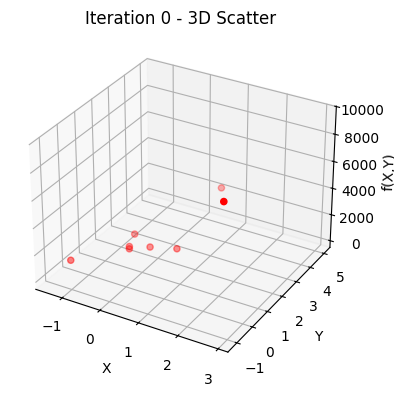

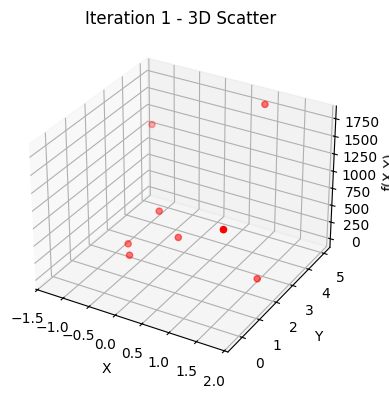

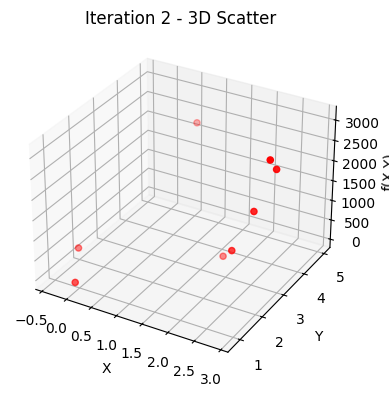

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
data = np.loadtxt("particles.txt")
iterations = np.unique(data[:,0].astype(int))

for it in iterations:
    # filter current iteration
    mask = data[:,0] == it
    subset = data[mask]
    x = subset[:,2]
    y = subset[:,3]
    z = subset[:,4]
    particle_ids = subset[:,1]

    # create figure with 3 plots
    fig = plt.figure(figsize=(15, 5))

    # Plot 1: 3D scatter
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.scatter(x, y, z, c='red', marker='o')
    ax1.set_title(f"Iteration {it} - 3D Scatter")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("f(X,Y)")

    plt.show()


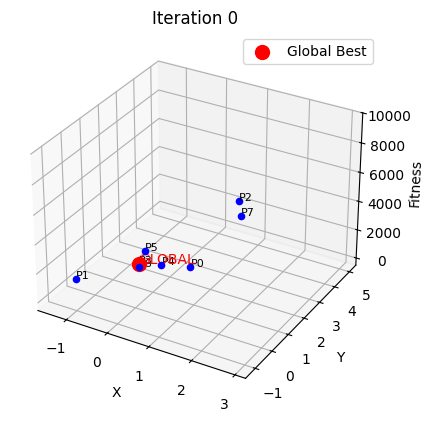

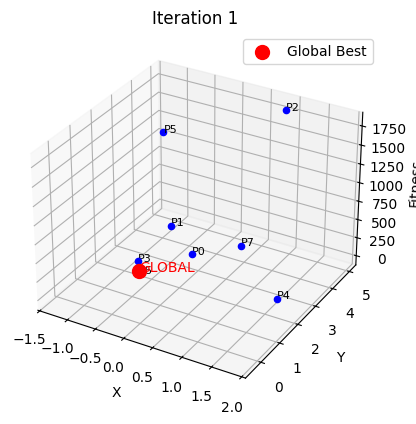

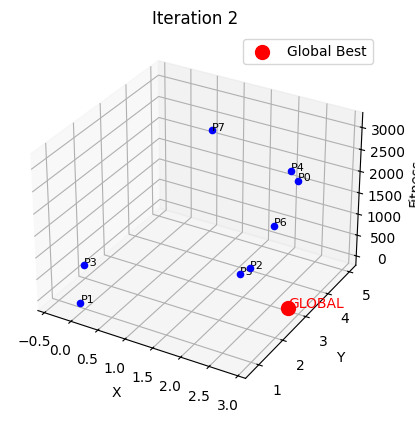

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read from txt file
with open("pso_out.txt", "r") as f:
    raw_data = f.readlines()

iterations = {}
globals_best = {}

for line in raw_data:
    parts = line.strip().split()
    if not parts:
        continue

    if parts[0] == "GLOBAL":
        it = int(parts[1])
        gx, gy, gf = float(parts[3]), float(parts[4]), float(parts[5])
        globals_best[it] = (gx, gy, gf)
    else:
        it, pid = int(parts[0]), int(parts[1])
        x, y, f = float(parts[2]), float(parts[3]), float(parts[4])
        if it not in iterations:
            iterations[it] = []
        iterations[it].append((pid, x, y, f))

# Plot each iteration separately
for it, particles in iterations.items():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot all particles
    for pid, x, y, f in particles:
        ax.scatter(x, y, f, color='blue')
        ax.text(x, y, f, f"P{pid}", fontsize=8)

    # Plot global best
    if it in globals_best:
        gx, gy, gf = globals_best[it]
        ax.scatter(gx, gy, gf, color='red', s=100, label="Global Best")
        ax.text(gx, gy, gf, "GLOBAL", fontsize=10, color='red')

    ax.set_title(f"Iteration {it}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Fitness")
    ax.legend()
    plt.show()
